# Summarize data

Create a unique .csv file containing the median price for each local_type (Maison, Appartement...) for each year (year_start-year_last).

This dataset allow the drawing of 'Fig 3. Evolution des prix médians des appartements dans le 06 entre `year_start` et `year_last`'.

In [2]:
year_start = 2018
year_last = 2023

range(2018, 2024)


## One year, one summary (one .csv file with median/mean value)

In [29]:
import pandas as pd
import numpy as np

years = range(year_start, year_last + 1)
print(years)

if True:
    # Itérer à travers les années
    for year in years:
        url = f"https://files.data.gouv.fr/geo-dvf/latest/csv/{year}/full.csv.gz"
        
        # Charger les données
        data = pd.read_csv(url, compression='gzip', header=0, sep=',', quotechar='"', low_memory=False, 
                            usecols=["type_local", "valeur_fonciere", "code_postal", "code_departement", "surface_reelle_bati", "longitude", "latitude"],
                            dtype={"code_postal": str})

        ### Remove rows with missing values
        data.dropna(inplace=True)

        ### Remove duplicates based on the columns "valeur_fonciere", "longitude", and "latitude"
        data.drop_duplicates(subset=["valeur_fonciere", "longitude", "latitude", "type_local"], inplace=True, keep='last')
        
        # Calculate value per square meter
        data["value_per_sqm"] = data["valeur_fonciere"] / data["surface_reelle_bati"]
        
        # Grouper les données par code postal et type_local
        grouped = data.groupby(["code_departement", "type_local"]).agg({
            "valeur_fonciere": ["median", "mean", "std"],
            "latitude": ["median", "mean"],
            "longitude": ["median", "mean"],
            "surface_reelle_bati": ["median", "mean", "std"],
            "value_per_sqm": ["median", "mean", "std"]
        }).reset_index()
        
        # Renommer les colonnes du DataFrame résultant
        grouped.columns = ["code_departement", "type_local",
                        "Median Value", "Mean Value", "Std Dev Value", 
                        "Median Latitude", "Mean Latitude", 
                        "Median Longitude", "Mean Longitude", 
                        "Median Surface Area", "Mean Surface Area", "Std Dev Surface Area",
                        "Median Value SQM", "Mean Value SQM", "Std Dev Value SQM"]
        
        # Créer un DataFrame pour l'année en cours
        year_df = pd.DataFrame(grouped)
        year_df["Year"] = year
        
        # Chemin du fichier de sortie pour l'année en cours
        output_path = f"summarized_data_{year}.csv.gz"
        
        # Enregistrer le DataFrame dans un fichier CSV
        year_df.to_csv(output_path, index=False, compression='gzip')
        
        print(f"Summary data for year {year} saved to {output_path}")
        year_df.head()


range(2018, 2024)
Summary data for year 2018 saved to summarized_data_2018.csv.gz
Summary data for year 2019 saved to summarized_data_2019.csv.gz
Summary data for year 2020 saved to summarized_data_2020.csv.gz
Summary data for year 2021 saved to summarized_data_2021.csv.gz
Summary data for year 2022 saved to summarized_data_2022.csv.gz
Summary data for year 2023 saved to summarized_data_2023.csv.gz


# Gather all the summaries (years)

In [30]:
import pandas as pd

file_paths = [(f"./summarized_data_{year}.csv.gz", year) for year in years]

# Load all data files and store them in a dictionary for easy access
all_data = []
for file_path, year in file_paths:
    all_data.append(pd.read_csv(file_path, compression='gzip'))

# Concatenate all data into a single DataFrame
all_data = pd.concat(all_data)

all_data.head()

,code_departement,type_local,Median Value,Mean Value,Std Dev Value,Median Latitude,Mean Latitude,Median Longitude,Mean Longitude,Median Surface Area,Mean Surface Area,Std Dev Surface Area,Median Value SQM,Mean Value SQM,Std Dev Value SQM,Year
0,01,Appartement,161970.0,226704.253725,392269.528866,46.204788,46.144437,5.635359,5.556810,66.0,69.583333,33.611402,2608.504902,3635.056147,7333.253429,2018
1,01,Local industriel. commercial ou assimilé,130231.2,293100.024543,598837.767088,46.204583,46.165174,5.390057,5.507083,100.0,465.852174,1401.991504,1341.005631,2326.318613,3109.039625,2018
2,01,Maison,210000.0,256241.075432,286829.038019,46.078142,46.078588,5.244333,5.300572,102.0,109.907641,42.152851,2058.823529,2376.305511,2608.229912,2018
3,02,Appartement,106500.0,129481.351823,131743.179657,49.565591,49.550847,3.317667,3.374632,56.0,60.539409,29.842668,1720.011484,2519.040813,2591.565557,2018
4,02,Local industriel. commercial ou assimilé,130000.0,269793.610453,564462.197849,49.588528,49.587398,3.328856,3.416545,134.0,532.111498,1331.719799,865.546218,2373.858499,7855.223612,2018


# Write full dataset to csv

In [31]:
output_path = f"geo_dvf_summarized_full.csv.gz"
all_data.to_csv(output_path, index=False, compression='gzip')

# Load data

In [32]:
from io import BytesIO
import pandas as pd
import requests

url = "https://sotisimmo.s3.eu-north-1.amazonaws.com/geo_dvf_summarized_full.csv.gz"

response = requests.get(url)

### Store data in a buffer
buffer = BytesIO(response.content)

### Load data into a Pandas dataframe
df_pandas = pd.read_csv(buffer, compression='gzip', header=0, sep=',', quotechar='"', low_memory=False, 
                        dtype={"code_postal": str})

df_pandas.head()

,code_departement,type_local,Median Value,Mean Value,Std Dev Value,Median Latitude,Mean Latitude,Median Longitude,Mean Longitude,Median Surface Area,Mean Surface Area,Std Dev Surface Area,Median Value SQM,Mean Value SQM,Std Dev Value SQM,Year
0,01,Appartement,161970.0,226704.253725,392269.528866,46.204788,46.144437,5.635359,5.556810,66.0,69.583333,33.611402,2608.504902,3635.056147,7333.253429,2018
1,01,Local industriel. commercial ou assimilé,130231.2,293100.024543,598837.767088,46.204583,46.165174,5.390057,5.507083,100.0,465.852174,1401.991504,1341.005631,2326.318613,3109.039625,2018
2,01,Maison,210000.0,256241.075432,286829.038019,46.078142,46.078588,5.244333,5.300572,102.0,109.907641,42.152851,2058.823529,2376.305511,2608.229912,2018
3,02,Appartement,106500.0,129481.351823,131743.179657,49.565591,49.550847,3.317667,3.374632,56.0,60.539409,29.842668,1720.011484,2519.040813,2591.565557,2018
4,02,Local industriel. commercial ou assimilé,130000.0,269793.610453,564462.197849,49.588528,49.587398,3.328856,3.416545,134.0,532.111498,1331.719799,865.546218,2373.858499,7855.223612,2018


# Plot data

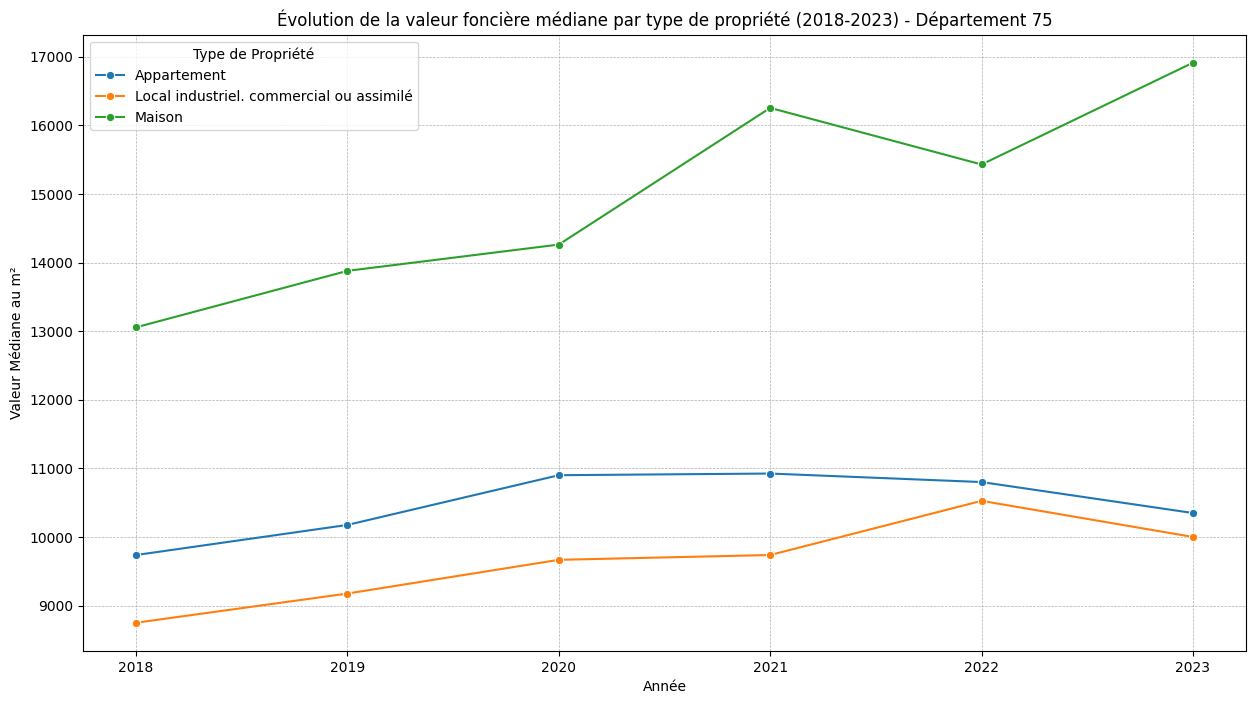

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_department_evolution(dataframe, department_code):
    """
    Plot the evolution of median property values over years for a given department.
    
    Parameters:
    - dataframe: DataFrame containing the data.
    - department_code: Two-digit code of the department (as a string).
    """
    # Filter data for the selected department
    dept_data = dataframe[dataframe['code_departement'] == department_code]
    
    plt.figure(figsize=(15, 8))
    
    # Use seaborn to plot the data for the selected department
    sns.lineplot(data=dept_data, x="Year", y="Median Value SQM", hue="type_local", marker="o")
    
    plt.title(f"Évolution de la valeur foncière médiane par type de propriété ({years[0]}-{years[-1]}) - Département {department_code}")
    plt.xlabel("Année")
    plt.ylabel("Valeur Médiane au m²")
    plt.legend(title="Type de Propriété")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Example usage for department 06
plot_department_evolution(df_pandas, "75")


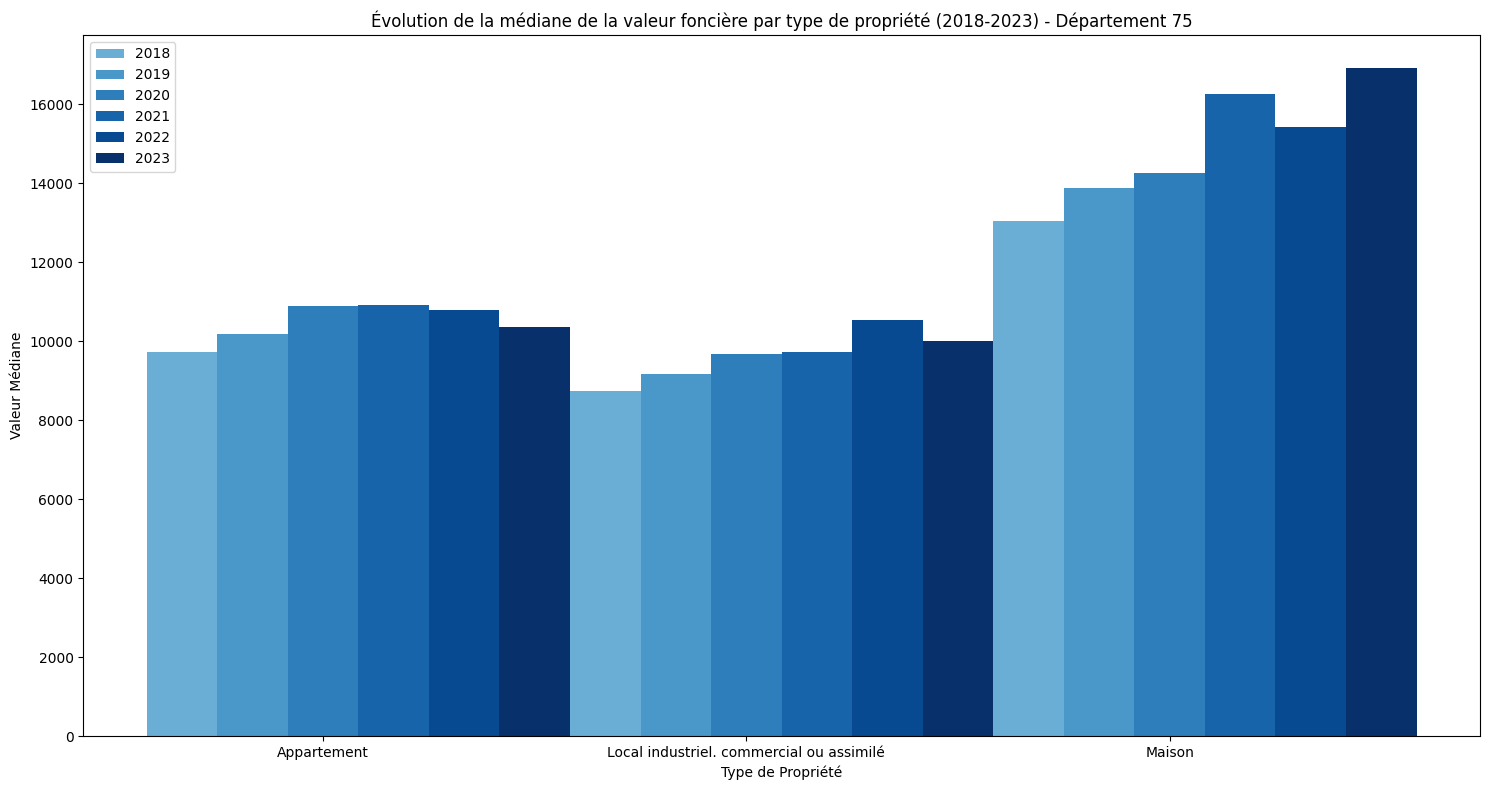

In [37]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def plot_department_bar_chart(dataframe, department_code):
    # Filter the dataframe by the provided department code
    dept_data = dataframe[dataframe['code_departement'] == department_code]

    # Pivot the dataframe for easier plotting
    medians_dpt = dept_data.pivot(index='type_local', columns='Year', values='Median Value SQM')

    # Define a colormap
    colormap = cm.Blues

    # Define the bar width
    bar_width = 0.2

    # Adjust the positions and the space between the property types
    adjusted_positions = [i + i*0.2 for i in range(len(medians_dpt.index))]

    # Generate a sequence of colors from the colormap
    linear_colors = [colormap(i) for i in np.linspace(0.5, 1, len(medians_dpt.columns))]

    # Plot stacked bar chart with adjusted spacing and the linearly increasing color palette
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plot bars for each year
    for i, year in enumerate(medians_dpt.columns):
        ax.bar([p + i*bar_width for p in adjusted_positions], 
               medians_dpt[year], 
               width=bar_width, 
               label=year, 
               color=linear_colors[i])  # Use the linearly increasing color palette

    # Set x-axis ticks, labels, and other plot details
    ax.set_xticks([p + 2*bar_width for p in adjusted_positions])
    ax.set_xticklabels(medians_dpt.index)
    ax.set_title(f"Évolution de la médiane de la valeur foncière par type de propriété ({years[0]}-{years[-1]}) - Département {department_code}")
    ax.set_xlabel("Type de Propriété")
    ax.set_ylabel("Valeur Médiane")
    ax.legend()
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.tight_layout()
    plt.show()

# Example usage for department 06
plot_department_bar_chart(df_pandas, "75")
